In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [3]:
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

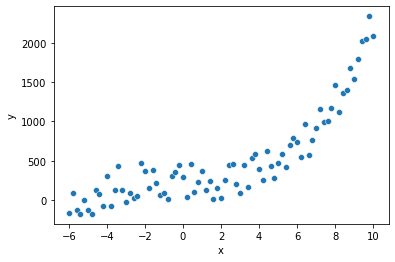

In [4]:
sns.scatterplot(x='x',y='y',data=data)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [6]:
kfold = KFold(n_splits=10)
trainX=[]
trainY=[]
testX=[]
testY=[]

In [7]:
for train_index, test_index in kfold.split(data['x']):
    #print(train_index, test_index)
    trainX.append(data['x'][train_index])
    testX.append(data['x'][test_index])
    trainY.append(data['y'][train_index])
    testY.append(data['y'][test_index]) 

In [8]:
stdTrainX=[]
stdTestX=[]
stdTrainY=[]
stdTestY=[]
for i in range(10):
    stdTrainX.append(((trainX[i]-np.mean(trainX[i]))/np.std(trainX[i])).values.reshape(-1,1))
    stdTrainY.append(((trainY[i]-np.mean(trainY[i]))/np.std(trainY[i])).values.reshape(-1,1))
    stdTestX.append(((testX[i]-np.mean(testX[i]))/np.std(testX[i])).values.reshape(-1,1))
    stdTestY.append(((testY[i]-np.mean(testY[i]))/np.std(testY[i])).values.reshape(-1,1))

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
models=[] ## to store all the models to use later for predicting test and traing error.

In [10]:
def matForm(X,degree):
    if(degree==1):
        return X
    NX=np.ones(X.shape[0])
    for i in range(degree):
        exp = i+1
        arr = np.power(X,exp)
        modArr = np.column_stack((NX,arr))
        NX = modArr
    return NX

In [11]:
# 3a. 
linearModel =[]
for i in range(10):
    linModel = SGDRegressor()
    linModel.fit(stdTrainX[i],stdTrainY[i].ravel())
    pred = linModel.predict(stdTestX[i])
    print("r2_score : ",r2_score(stdTestY[i],pred))
    print("weights : ",linModel.coef_)
    print("w0 : ",linModel.intercept_)
    linearModel.append(linModel)
    print("**************\n")

r2_score :  -0.03078034091038795
weights :  [0.78052923]
w0 :  [0.00026074]
**************

r2_score :  -0.4856135963627628
weights :  [0.79271004]
w0 :  [0.00091658]
**************

r2_score :  -0.4365347898781047
weights :  [0.79279543]
w0 :  [0.00060253]
**************

r2_score :  0.09157816912273731
weights :  [0.79032673]
w0 :  [-6.32715653e-05]
**************

r2_score :  -1.3705650235229294
weights :  [0.80067442]
w0 :  [-0.00032439]
**************

r2_score :  -0.5252934872003991
weights :  [0.81182009]
w0 :  [0.00021641]
**************

r2_score :  -0.5894516894233695
weights :  [0.81787092]
w0 :  [0.00090603]
**************

r2_score :  -0.06444470600383867
weights :  [0.80537596]
w0 :  [0.00072959]
**************

r2_score :  0.489643600474686
weights :  [0.76974377]
w0 :  [0.00037206]
**************

r2_score :  0.8204166192086676
weights :  [0.78200056]
w0 :  [-0.00069794]
**************



In [12]:
models.append(linearModel)

In [13]:
len(models)

1

In [14]:
#### 3. b.
deg3Models=[]
#poly = PolynomialFeatures(degree=3)
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),3)
    X_Poly_test = matForm(stdTestX[i].ravel(),3)
    #poly.fit(X_Poly,stdTrainY[i])
    polyModel = SGDRegressor()
    polyModel.fit(X_Poly,stdTrainY[i].ravel())
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(stdTestY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg3Models.append(polyModel)

r2_score :  0.1602973489534022
weights :  [-0.19480844  0.24457944  0.41974345  0.31417952]
w0  [-0.19484533]
*******************

r2_score :  -1.0979828014203528
weights :  [-0.18996039  0.27741407  0.4729652   0.31752236]
w0  [-0.18999385]
*******************

r2_score :  -1.321212127398676
weights :  [-0.17610174  0.25318371  0.45313686  0.35540183]
w0  [-0.17613213]
*******************

r2_score :  -0.2875701169776954
weights :  [-0.16649342  0.23123286  0.42149977  0.38053703]
w0  [-0.16652082]
*******************

r2_score :  -1.8833087616576671
weights :  [-0.1523339   0.21912449  0.35565032  0.39354137]
w0  [-0.15235838]
*******************

r2_score :  -0.30536279325918203
weights :  [-0.16672244  0.20819242  0.34131631  0.38195793]
w0  [-0.16675061]
*******************

r2_score :  -0.5076996601512094
weights :  [-0.16417073  0.18114402  0.30211692  0.36504432]
w0  [-0.16419732]
*******************

r2_score :  -0.13705997049659446
weights :  [-0.15382524  0.14466242  0.26334

In [15]:
models.append(deg3Models)

In [16]:
#### 3. b.
deg5Models=[]
#poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),5)
    X_Poly_test = matForm(stdTestX[i].ravel(),5)
    #poly.fit(X_Poly,stdTrainY[i])
    polyModel = SGDRegressor()
    polyModel.fit(X_Poly,stdTrainY[i].ravel())
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(stdTestY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg5Models.append(polyModel)

r2_score :  0.135799138621159
weights :  [-0.17717724  0.29008191  0.08709117  0.2111274   0.14196839  0.02519869]
w0  [-0.17722353]
*******************

r2_score :  -1.230383432421565
weights :  [-0.16271543  0.28162681  0.08061983  0.23410031  0.17379527  0.05859679]
w0  [-0.16275728]
*******************

r2_score :  -1.6070138200565025
weights :  [-0.15803626  0.26124413  0.07962897  0.22273677  0.19338095  0.06713022]
w0  [-0.15807061]
*******************

r2_score :  -0.2535858090381795
weights :  [-0.15733829  0.23861415  0.0695364   0.20964918  0.18346927  0.07813036]
w0  [-0.15737063]
*******************

r2_score :  -2.0920155548960153
weights :  [-0.14322705  0.22240573  0.03907376  0.19893226  0.17480192  0.09387507]
w0  [-0.14325075]
*******************

r2_score :  -0.25613434450031325
weights :  [-0.15615933  0.225782    0.05140787  0.18299063  0.15262883  0.08165263]
w0  [-0.15618781]
*******************

r2_score :  -0.3786281583452975
weights :  [-0.15950071  0.2067134

In [17]:
models.append(deg5Models)

In [18]:
#### 3. b.
deg50Models=[]
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),50)
    X_Poly_test = matForm(stdTestX[i].ravel(),50)
    print(X_Poly.shape, X_Poly_test.shape)
    polyModel = SGDRegressor()
    polyModel.fit(X_Poly,stdTrainY[i].ravel())
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(stdTestY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg50Models.append(polyModel)

(72, 51) (9, 51)
r2_score :  -2.063739649390353e+59
weights :  [-1.61066949e+10 -6.53136009e+10  4.13507359e+09 -1.52804785e+11
 -2.04889246e+10 -4.00452215e+11 -7.81182488e+10 -1.02307490e+12
 -1.89582856e+11 -2.55840344e+12 -3.61533562e+11 -6.33212621e+12
 -4.79714944e+11 -1.56255509e+13  8.19686175e+10 -3.86032963e+13
  3.75836231e+12 -9.56857059e+13  1.88265901e+13 -2.38198329e+14
  7.14166764e+13 -5.95761723e+14  2.40137654e+14 -1.49726246e+15
  7.53326516e+14 -3.78110229e+15  2.25600372e+15 -9.59477914e+15
  6.52706395e+15 -2.44662438e+16  1.83643130e+16 -6.26993588e+16
  5.04215272e+16 -1.61510239e+17  1.35272842e+17 -4.18295535e+17
  3.54425197e+17 -1.08953063e+18  9.04587105e+17 -2.85502324e+18
  2.23710034e+18 -7.52904036e+18  5.30810349e+18 -1.99880214e+19
  1.18567566e+19 -5.34348629e+19  2.39226654e+19 -1.43880784e+20
  3.87471460e+19 -3.90272300e+20  2.34160402e+19]
w0  [-1.61005882e+10]
*******************

(73, 51) (8, 51)
r2_score :  -1.2880249683098149e+63
weights :  

In [19]:
models.append(deg50Models)

In [20]:
len(models)

4

mean train error :  1.6092259513810316
std train error :  0.7594320766334592
***************
mean train error :  1.6283900484532803
std train error :  0.7621856557674628
***************
mean train error :  1.6285249519578686
std train error :  0.7541205924899209
***************
mean train error :  1.624616341348578
std train error :  0.7483355075425994
***************
mean train error :  1.6410796371458574
std train error :  0.7528017291910571
***************
mean train error :  1.6590518991526566
std train error :  0.7562900447999603
***************
mean train error :  1.6689136621799714
std train error :  0.7640881367846786
***************
mean train error :  1.6486309645815158
std train error :  0.7823712607841453
***************
mean train error :  1.5925056043954477
std train error :  0.8648944967093384
***************
mean train error :  1.6115253650085075
std train error :  0.7218052965501339
***************


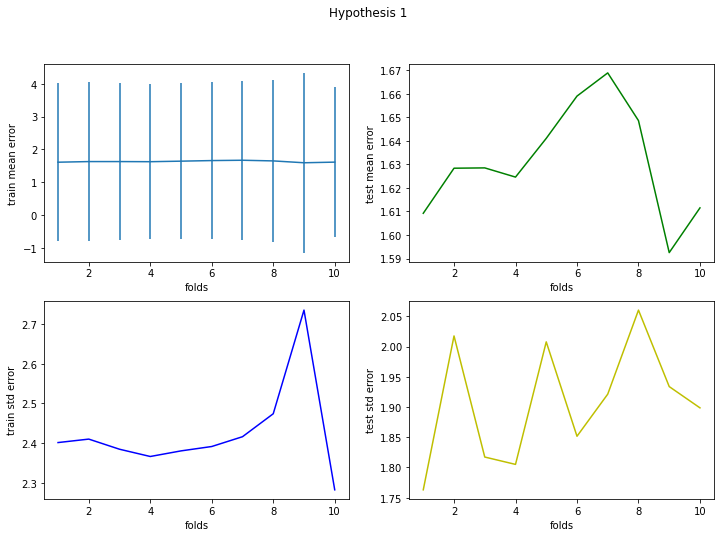

min training error  1.5925056043954477  at index 9


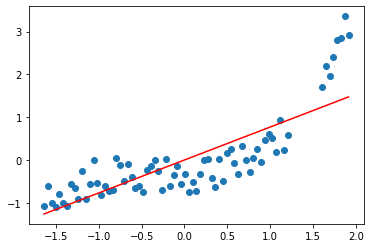

In [21]:
### 4.a (linear regression)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
for i in range(10):
    predTrain = models[0][i].predict(stdTrainX[i])
    predTest = models[0][i].predict(stdTestX[i])
    train_err = np.square(predTrain-stdTrainY[i])
    test_err = np.square(predTest-stdTestY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 1')
plt.show()


#### 4.b)
#### minimum mean training error right????
min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
pred = models[0][min_ind].predict(stdTrainX[min_ind])
plt.plot(stdTrainX[min_ind],pred,'r')

mean train error :  1.8585901304501824
std train error :  0.9363839855608501
***************
mean train error :  1.8649425474590253
std train error :  0.917383714301064
***************
mean train error :  1.8648765145171606
std train error :  0.9076804717960445
***************
mean train error :  1.8618920428417118
std train error :  0.9021985344594351
***************
mean train error :  1.8717206980315182
std train error :  0.9020510024411814
***************
mean train error :  1.880223558059961
std train error :  0.9062131077444225
***************
mean train error :  1.8879753244484807
std train error :  0.9149991070950023
***************
mean train error :  1.9068329900881311
std train error :  0.9597221618886749
***************
mean train error :  1.900600450496495
std train error :  1.1052422545519045
***************
mean train error :  1.7988064765712177
std train error :  0.8594770734271249
***************


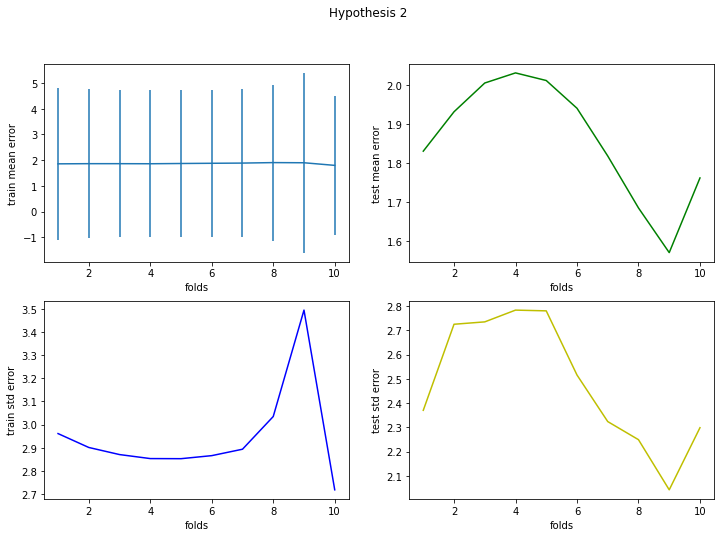

min training error  1.7988064765712177  at index 10


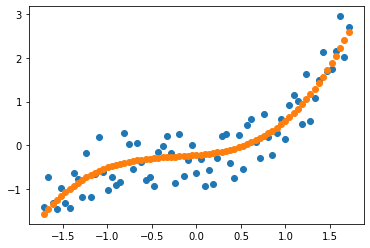

In [22]:
### 4.a (polynomial regression -degree 3)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),3)
    X_Poly_test = matForm(stdTestX[i].ravel(),3)
    predTrain = models[1][i].predict(X_Poly)
    predTest = models[1][i].predict(X_Poly_test)
    train_err = np.square(predTrain-stdTrainY[i])
    test_err = np.square(predTest-stdTestY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 2')
plt.show()

min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
X_Poly = matForm(stdTrainX[min_ind].ravel(),3)
pred = models[1][min_ind].predict(X_Poly)
plt.scatter(stdTrainX[min_ind],pred)

mean train error :  1.8151788070381887
std train error :  0.9532421805453022
***************
mean train error :  1.9816046157034806
std train error :  1.0303960571368629
***************
mean train error :  1.8862457688031982
std train error :  0.9825488259752029
***************
mean train error :  1.853106450652429
std train error :  0.9577781832795728
***************
mean train error :  1.9211223201926695
std train error :  0.9949480390709701
***************
mean train error :  1.8930973307954317
std train error :  0.9759998938166112
***************
mean train error :  1.9555791424385576
std train error :  1.0182654476022455
***************
mean train error :  1.9866375327978951
std train error :  1.056688189092611
***************
mean train error :  1.999393424519279
std train error :  1.2293425599072787
***************
mean train error :  1.7752553752193403
std train error :  0.8892496427099562
***************


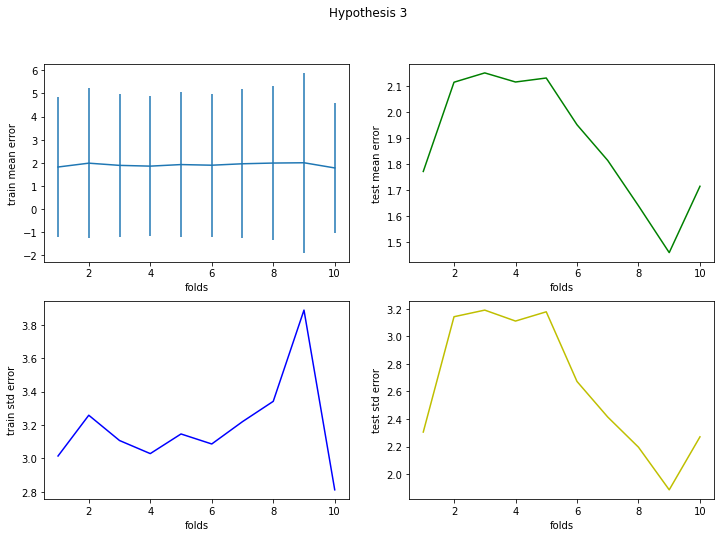

min training error  1.7752553752193403  at index 10


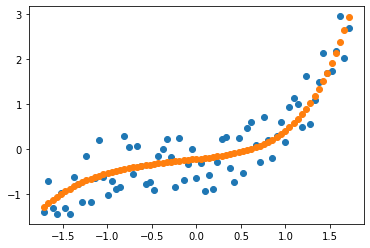

In [23]:
### 4.a (polynomial regression -degree 5)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),5)
    X_Poly_test = matForm(stdTestX[i].ravel(),5)
    predTrain = models[2][i].predict(X_Poly)
    predTest = models[2][i].predict(X_Poly_test)
    train_err = np.square(predTrain-stdTrainY[i])
    test_err = np.square(predTest-stdTestY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 3')
plt.show()

min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
X_Poly = matForm(stdTrainX[min_ind].ravel(),5)
pred = models[2][min_ind].predict(X_Poly)
plt.scatter(stdTrainX[min_ind],pred)

mean train error :  3.7095492221624044e+62
std train error :  6.807877345376393e+62
***************
mean train error :  2.656204717091105e+71
std train error :  6.468647973660259e+71
***************
mean train error :  4.925983255122884e+65
std train error :  1.2034822639345744e+66
***************
mean train error :  4.602249486384325e+62
std train error :  1.1288317119296993e+63
***************
mean train error :  5.676287756536657e+59
std train error :  1.3634288838266933e+60
***************
mean train error :  6.610880511587687e+59
std train error :  1.619655664159232e+60
***************
mean train error :  1.5008130828421554e+63
std train error :  3.679838239098746e+63
***************
mean train error :  1.1354503776165832e+67
std train error :  2.7726895469351026e+67
***************
mean train error :  4.565754678316162e+70
std train error :  1.1077571430049734e+71
***************
mean train error :  2.641618171152624e+61
std train error :  6.324887320826314e+61
***************


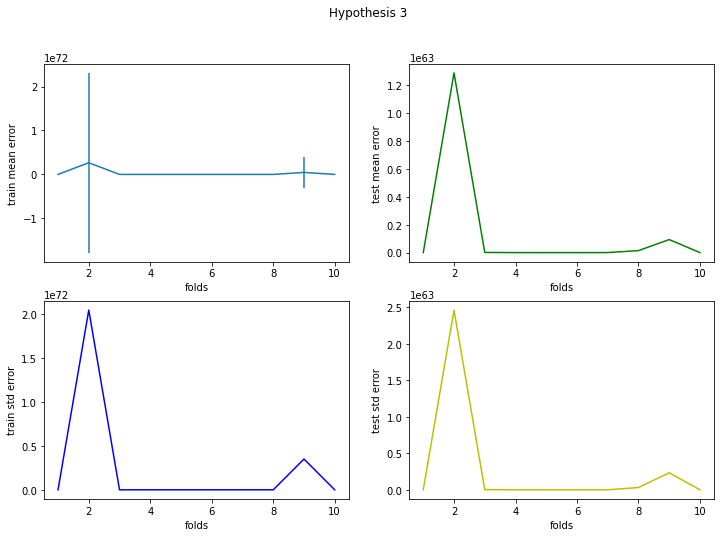

min training error  5.676287756536657e+59  at index 5


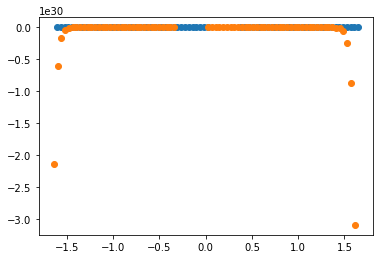

In [33]:
### 4.a (polynomial regression -degree 50)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
#poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = matForm(stdTrainX[i].ravel(),50)
    X_Poly_test = matForm(stdTestX[i].ravel(),50)
    predTrain = models[3][i].predict(X_Poly)
    predTest = models[3][i].predict(X_Poly_test)
    train_err = np.square(predTrain-stdTrainY[i])
    test_err = np.square(predTest-stdTestY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 3')
plt.show()

min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[5],stdTrainY[5])
X_Poly = matForm(stdTrainX[5],50)
pred = models[3][min_ind].predict(X_Poly)
plt.scatter(stdTrainX[min_ind],pred)

In [104]:
len(models)

4